In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.applications.efficientnet import preprocess_input
import os

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=1
)

Found 4438 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
print("Classes:", class_names)

Classes: ['Apple__Black__Rot', 'Apple__Healthy', 'Apple__Scab', 'Cedar__Apple__Rust', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
# Collect equal samples per class
images_by_class = {i: [] for i in range(len(class_names))}

for images, labels in dataset:
    label = int(labels[0].numpy())
    if len(images_by_class[label]) < 150:  # ✅ take 100 per class (you can change)
        images_by_class[label].append((images, labels))
    if all(len(v) >= 150 for v in images_by_class.values()):
        break

balanced_images = []
balanced_labels = []

for c in range(len(class_names)):
    for img, lbl in images_by_class[c]:
        balanced_images.append(img.numpy()[0])
        balanced_labels.append(lbl.numpy()[0])

balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)

print("✅ Balanced dataset created")
print("Total images:", len(balanced_images))

✅ Balanced dataset created
Total images: 1050


In [6]:
# Preprocess and batch the balanced dataset
balanced_images = preprocess_input(balanced_images)
balanced_ds = tf.data.Dataset.from_tensor_slices((balanced_images, balanced_labels))
balanced_ds = balanced_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
✅ EfficientNetB0 Evaluation Metrics (Balanced Dataset):
Accuracy:  0.9981
Precision: 0.9981
Recall:    0.9981
F1-Score:  0.9981

📊 Classification Report:
                       precision    recall  f1-score   support

    Apple__Black__Rot       1.00      1.00      1.00       150
       Apple__Healthy       0.99      0.99      0.99       150
          Apple__Scab       0.99      1.00      1.00       150
   Cedar__Apple__Rust       1.00      1.00      1.00       150
Potato___Early_blight       1.00      1.00      1.00       150
 Potato___Late_blight       1.00      1.00      1.00       150
     Potato___healthy       1.00      0.99      1.00       150

             accuracy                           1.00      1050
            macro avg       1.00      1.00      1.00      1050
         weighted avg       1.00      1.00      1.00      1050



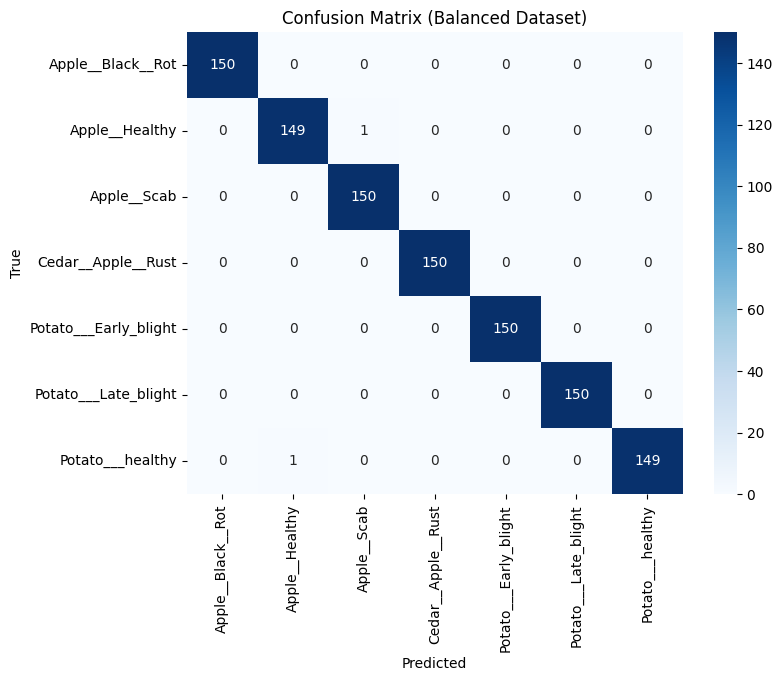

In [7]:
# ✅ Load the saved model
model_efficientnetb0 = tf.keras.models.load_model("../Store-Model/model_efficientnetb0.keras")

# ✅ Get all true and predicted labels at once (faster)
y_true = np.concatenate([y for _, y in balanced_ds], axis=0)
y_pred = np.argmax(model_efficientnetb0.predict(balanced_ds), axis=1)

# ✅ Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("✅ EfficientNetB0 Evaluation Metrics (Balanced Dataset):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Balanced Dataset)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step
✅ VGG Evaluation Metrics (Balanced Dataset):
Accuracy:  0.9781
Precision: 0.9791
Recall:    0.9781
F1-Score:  0.9782

📊 Classification Report:
                       precision    recall  f1-score   support

    Apple__Black__Rot       1.00      0.99      1.00       150
       Apple__Healthy       0.97      0.99      0.98       150
          Apple__Scab       1.00      0.97      0.98       150
   Cedar__Apple__Rust       0.99      0.99      0.99       150
Potato___Early_blight       0.99      0.98      0.99       150
 Potato___Late_blight       0.91      0.99      0.95       150
     Potato___healthy       0.99      0.93      0.96       150

             accuracy                           0.98      1050
            macro avg       0.98      0.98      0.98      1050
         weighted avg       0.98      0.98      0.98      1050



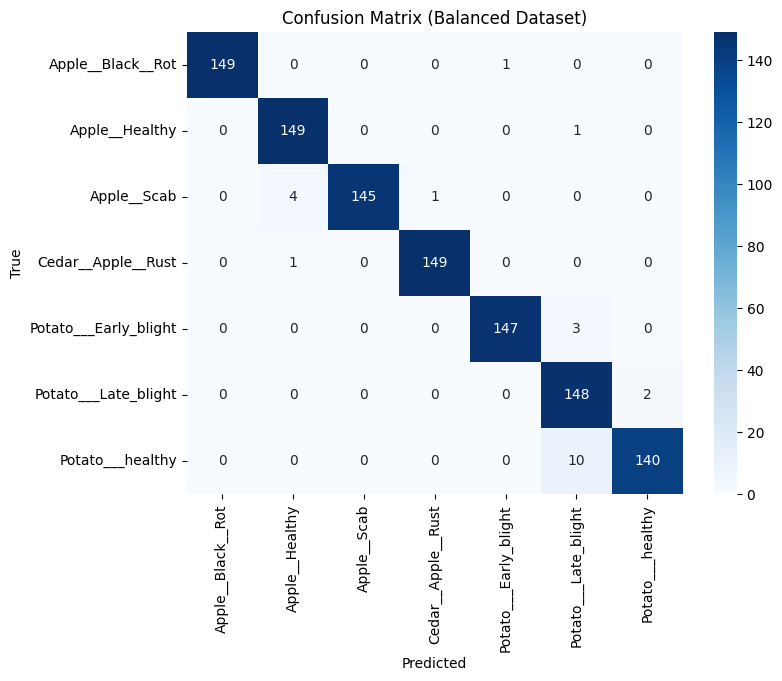

In [8]:
# VGG Model
model_vgg = tf.keras.models.load_model("../Store-Model/vgg16_model.keras")

# ✅ Get all true and predicted labels at once (faster)
y_true = np.concatenate([y for _, y in balanced_ds], axis=0)
y_pred = np.argmax(model_vgg.predict(balanced_ds), axis=1)

# ✅ Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("✅ VGG Evaluation Metrics (Balanced Dataset):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Balanced Dataset)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 484ms/step
✅ Sequential Evaluation Metrics (Balanced Dataset):
Accuracy:  0.9019
Precision: 0.9083
Recall:    0.9019
F1-Score:  0.9014

📊 Classification Report:
                       precision    recall  f1-score   support

    Apple__Black__Rot       0.79      0.98      0.88       150
       Apple__Healthy       0.87      0.91      0.89       150
          Apple__Scab       0.97      0.77      0.86       150
   Cedar__Apple__Rust       0.97      0.95      0.96       150
Potato___Early_blight       0.96      0.99      0.97       150
 Potato___Late_blight       0.91      0.83      0.87       150
     Potato___healthy       0.89      0.89      0.89       150

             accuracy                           0.90      1050
            macro avg       0.91      0.90      0.90      1050
         weighted avg       0.91      0.90      0.90      1050



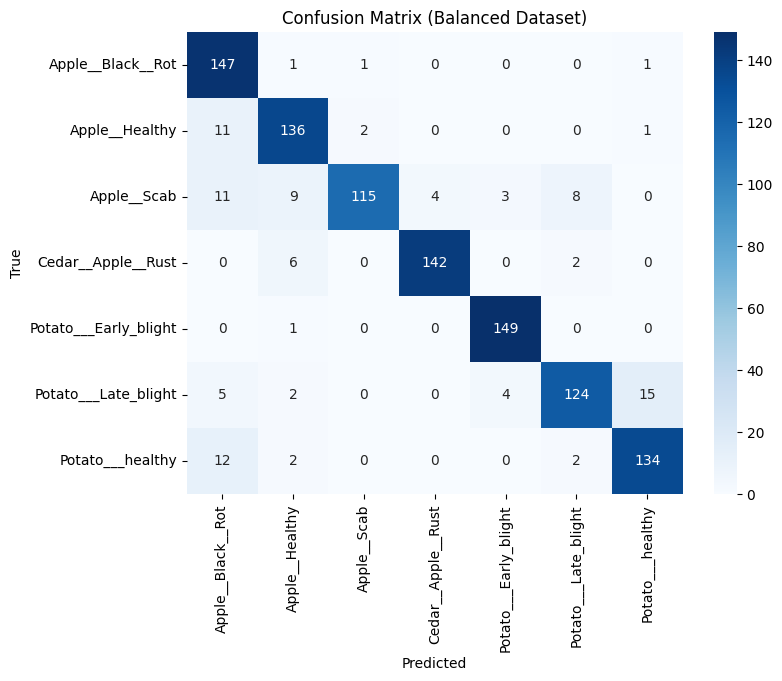

In [9]:
# Sequential Model
model_seq = tf.keras.models.load_model("../Store-Model/model_seq.keras")

# ✅ Get all true and predicted labels at once (faster)
y_true = np.concatenate([y for _, y in balanced_ds], axis=0)
y_pred = np.argmax(model_seq.predict(balanced_ds), axis=1)

# ✅ Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("✅ Sequential Evaluation Metrics (Balanced Dataset):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Balanced Dataset)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step
✅ DenseNet121 Evaluation Metrics (Balanced Dataset):
Accuracy:  0.8514
Precision: 0.8726
Recall:    0.8514
F1-Score:  0.8504

📊 Classification Report:
                       precision    recall  f1-score   support

    Apple__Black__Rot       0.92      0.80      0.85       150
       Apple__Healthy       0.84      0.96      0.90       150
          Apple__Scab       0.86      0.81      0.84       150
   Cedar__Apple__Rust       0.96      0.93      0.94       150
Potato___Early_blight       0.88      0.95      0.91       150
 Potato___Late_blight       0.66      0.91      0.76       150
     Potato___healthy       1.00      0.60      0.75       150

             accuracy                           0.85      1050
            macro avg       0.87      0.85      0.85      1050
         weighted avg       0.87      0.85      0.85      1050



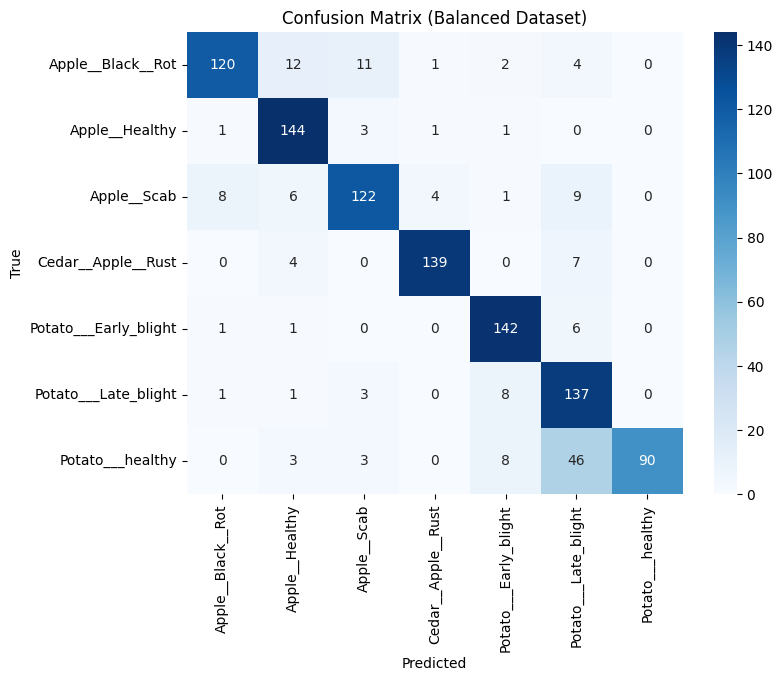

In [10]:
# DenseNet121 Model
model_DenseNet121 = tf.keras.models.load_model("../Store-Model/model_densenet121.keras")

# ✅ Get all true and predicted labels at once (faster)
y_true = np.concatenate([y for _, y in balanced_ds], axis=0)
y_pred = np.argmax(model_DenseNet121.predict(balanced_ds), axis=1)

# ✅ Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("✅ DenseNet121 Evaluation Metrics (Balanced Dataset):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Balanced Dataset)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()